# COVID Cough Capstone Project- Exploratory Data Analysis

Where is the data coming from?
https://www.nature.com/articles/s41597-021-00937-4#Sec7

What is the problem you are trying to solve? 

**Build a cough detection model using 25,000 recorded sound datasets that characterizes if a person has a respiratory illness or not based on provided personal information.**

#### Importing Libraries

In [5]:
#pip install webm

In [1]:
import os, json 
import pandas as pd
import numpy as np
import ffmpeg 
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
#path_to_files = '/Users/yevheniyashevchenko/Documents/COVIDCoughCapstone/public_dataset/'
path_to_files = '/Users/yevheniyashevchenko/Documents - Yevheniya’s MacBook Pro/COVIDCoughCapstone/public_dataset/'
json_files = [loc_json for loc_json in os.listdir(path_to_files) if loc_json.endswith('.json')]
#print(json_files) shows all files end with .json 

#### Loading the Data

**Loading the audio files**

In [4]:
fileExt = ['.webm', '.ogg']
webm_files = [files for files in os.listdir(path_to_files) if files.endswith(tuple(fileExt))]


In [5]:
audios = []

for file in webm_files: 
    with open(path_to_files + file) as sound_files:
        audios.append(sound_files)

In [6]:
print(len(audios)) 

27550


In [6]:
print(audios[0])

<_io.TextIOWrapper name='/Users/yevheniyashevchenko/Documents/COVIDCoughCapstone/public_dataset/cf593695-ce85-4a56-81c6-14617de66f71.ogg' mode='r' encoding='UTF-8'>


**Practicing feature extraction with one audio file**

In [7]:
import time
from tqdm import tqdm
from os import path
from pydub import AudioSegment 
from pydub.playback import play

In [8]:
import audio_metadata
import librosa

In [9]:
#Make this into a function so that we can work with multiple files 

In [10]:
#audio_metadata.load(audios[0])
y, sr = librosa.load(path_to_files + webm_files[1], sr=44100, mono=False)

    PySoundFile failed. Trying audioread instead.


In [11]:
y_8k = librosa.resample(y, orig_sr=sr, target_sr=8000)

In [12]:
y_mono = librosa.to_mono(y)

In [13]:
dur = np.arange(0, len(y_mono)) / 44100

In [14]:
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import plotly
#duration array of the audio file
dur = np.arange(0, len(y_mono)) / 44100
# plotly.offline.iplot({ "data": [go.Scatter(x=dur, 
#                                            y=y_mono, 
#                                            name='mono')]})

In [15]:
output_list=[]
for i in range(0,len(dur)):
    output = {'dur': dur[i], "y": y_mono[i]}
    output_list.append(output)

<AxesSubplot:xlabel='dur', ylabel='y'>

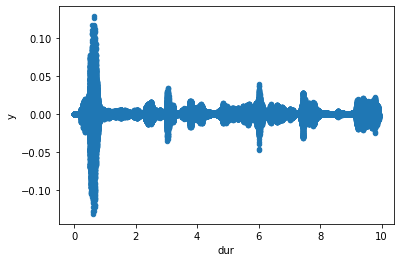

In [16]:
pd.DataFrame(output_list).plot(x='dur', y='y', kind='scatter')

In [17]:
df_a = pd.DataFrame(y, columns=['Amplitude'])

In [18]:
df_a.index = [(1/sr)*i for i in range(len(df_a.index))]

In [19]:
df_a.mean()

Amplitude    3.055101e-09
dtype: float32

In [20]:
df_a.max()

Amplitude    0.128187
dtype: float32

In [21]:
import librosa.display

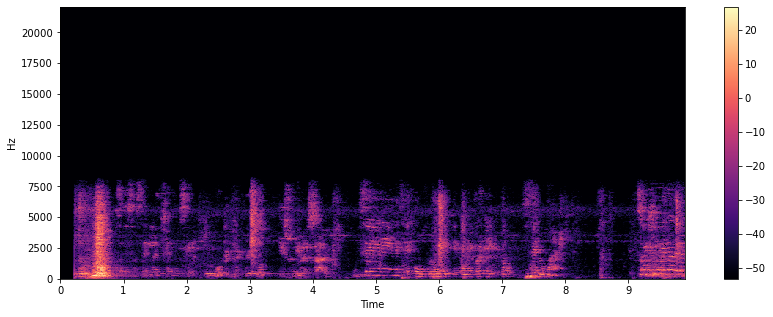

In [22]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

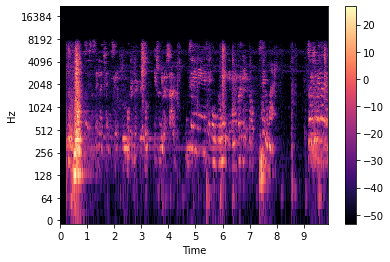

In [23]:
#we can convert the frequency axis to a logarithmic one
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### Using Various Spectra Analysis for Feature Extractions

    Pass y=[ 0.          0.          0.         ... -0.0010444  -0.00115949
     -0.00112892] as keyword args. From version 0.10 passing these as positional arguments will result in an error


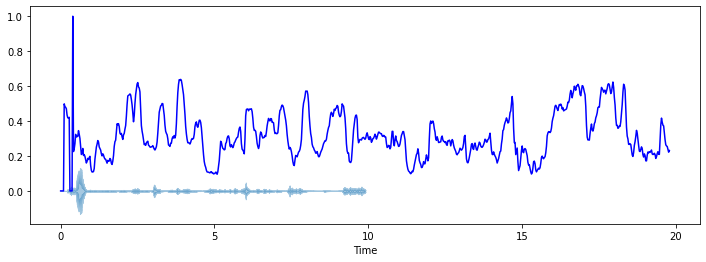

In [24]:
#Spectra Centroid
#Center mass of audio data 
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

(20, 853)


    Pass y=[ 0.          0.          0.         ... -0.0010444  -0.00115949
     -0.00112892] as keyword args. From version 0.10 passing these as positional arguments will result in an error


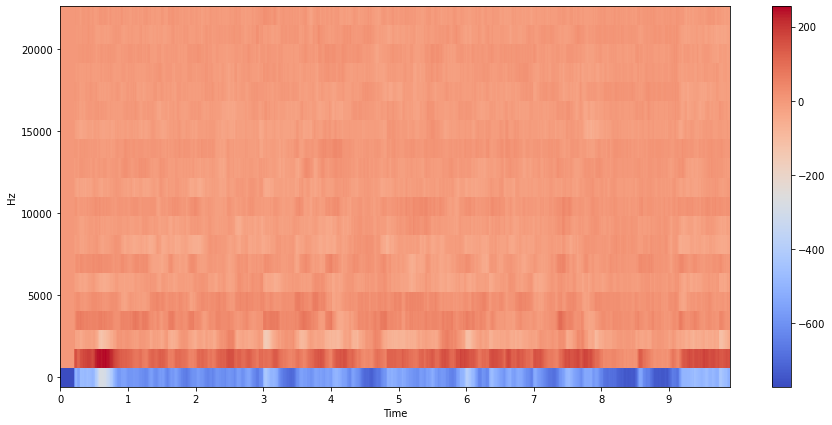

In [25]:
#Mel-Frequency Cepstral Coefficients(MFCCs)
#models the characteristics of the human voice
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis = 'hz')
plt.colorbar()

    Pass y=[0.01       0.01       0.01       ... 0.0089556  0.00884051 0.00887108] as keyword args. From version 0.10 passing these as positional arguments will result in an error


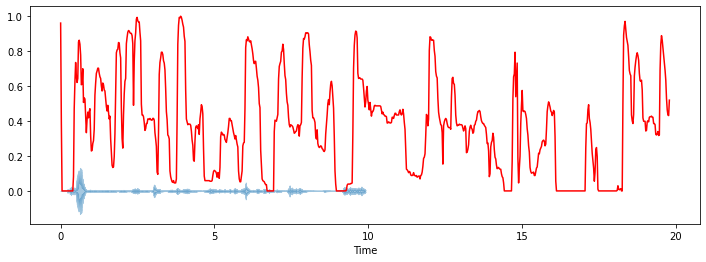

In [26]:
#Spectral Rolloff
#Analyze the waveform suddenly drops from high to 0
#In calculus this is the non-differentiabilty point in our waveform 
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [28]:
rms =  librosa.feature.rms(y=y)
#chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)

In [29]:
len(spec_bw)

1

In [30]:
local_min_max = [[min(x), max(x)] for x in mfccs]
min_y = 412413131124141
max_y = -341243141341411341
for y in local_min_max:
    if y[0] < min_y: min_y = y[0]
    if y[1] < min_y: min_y = y[1]
    if y[0] > max_y: max_y = y[0]
    if y[1] > max_y: max_y = y[1]
    

In [31]:
min_y

-771.5548

In [32]:
max_y

254.66293

In [33]:
len(mfcc)

20

In [34]:
len(rms[0])

853

In [35]:
df1 = pd.DataFrame(
    {
        'rms': rms[0], 
        'spec_cent' : spec_cent[0],
        'spec_bw' : spec_bw[0],
        'rolloff' : rolloff[0],
        'zcr' : zcr[0]
    }
)

In [36]:
df1.head(10)

,rms,spec_cent,spec_bw,rolloff,zcr
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000005,4307.505867,5283.623947,10874.267578,0.041016
6,0.000005,4176.339175,5239.670357,10486.669922,0.041016
7,0.000005,4136.589313,5226.470363,10400.537109,0.041016
8,0.000005,4066.152215,5203.590122,10271.337891,0.041016
9,0.000005,3754.728717,5097.834768,9431.542969,0.041016


In [37]:
df1.describe()

,rms,spec_cent,spec_bw,rolloff,zcr
count,853.000000,853.000000,853.000000,853.000000,853.000000
mean,0.003272,2725.790917,2528.608396,4741.798134,0.093798
std,0.005795,1143.071408,783.814559,1759.074382,0.060218
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000727,1951.453487,2015.348467,3596.044922,0.048828
50%,0.001675,2539.366593,2313.917888,4909.570312,0.078613
75%,0.003921,3409.717284,2878.397324,5878.564453,0.126465
max,0.045307,8643.121363,5737.569994,15999.169922,0.274414


In [38]:
import random

In [39]:
audios_sample = random.sample(audios, 10)

In [40]:
#Talked about adding amplitude mean and median 
#Adding all this information to a dataframe with each value per column 

#do it with the avg for each file
audio_list = []
for i,s in enumerate(audios_sample, start=1):
    audio_dict = {}
    with open(path_to_files + webm_files[i],"rb") as s_:
        y, sr = librosa.load(path_to_files + webm_files[i], sr=44100, mono=False)
        rms_1 = librosa.feature.rms(y=y)
        spec_cent_1 = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw_1 = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff_1 = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr_1 = librosa.feature.zero_crossing_rate(y)
        mfcc_1 = librosa.feature.mfcc(y=y, sr=sr)
        audio_dict['rms_mean'] = np.mean(rms_1)
        audio_dict['rms_max'] = np.max(rms_1)
        audio_dict['spec_cent_mean'] = np.mean(spec_cent_1)
        audio_dict['spec_cent_max'] = np.max(spec_cent_1)
        audio_dict['spec_bw_mean'] = np.mean(spec_bw_1)
        audio_dict['spec_bw_max'] = np.max(spec_bw_1)
        audio_dict['rolloff_mean'] = np.mean(rolloff_1)
        audio_dict['rolloff_max'] = np.max(rolloff_1)
        audio_dict['zcr_mean'] = np.mean(zcr_1)
        audio_dict['zcr_max'] = np.max(zcr_1)
        audio_dict['mfcc_mean'] = []
        for e in mfcc_1: 
            audio_dict['mfcc_mean'].append(np.mean(e))
       # audio_dict['mfcc'] = mfcc_1
    audio_list.append(audio_dict)    


    PySoundFile failed. Trying audioread instead.
    PySoundFile failed. Trying audioread instead.
    PySoundFile failed. Trying audioread instead.
    PySoundFile failed. Trying audioread instead.
    PySoundFile failed. Trying audioread instead.
    PySoundFile failed. Trying audioread instead.
    PySoundFile failed. Trying audioread instead.
    PySoundFile failed. Trying audioread instead.
    PySoundFile failed. Trying audioread instead.
    PySoundFile failed. Trying audioread instead.


In [41]:
df_audio_features = pd.DataFrame(audio_list)

In [42]:
df_audio_features.head(10)

,rms_mean,rms_max,spec_cent_mean,spec_cent_max,spec_bw_mean,spec_bw_max,rolloff_mean,rolloff_max,zcr_mean,zcr_max,mfcc_mean
0,0.003272,0.045307,2725.790917,8643.121363,2528.608396,5737.569994,4741.798134,15999.169922,0.093798,0.274414,"[-583.16815, 108.17483, -28.95962, 28.632124, ..."
1,0.040019,0.268396,3056.461030,18915.416645,3377.612557,6350.198655,5619.722946,21317.871094,0.073610,0.343750,"[-415.2626, 86.08437, -8.503078, 17.08059, 13...."
2,0.068667,0.455073,2532.270462,10120.249909,2460.946615,6109.350601,4337.534999,17205.029297,0.105732,0.428711,"[-424.715, 73.59678, -32.040756, -20.206451, -..."
3,0.037967,0.444520,2673.069302,10120.249909,2734.758435,6604.815393,5077.971004,17205.029297,0.081322,0.653809,"[-397.3361, 71.133644, -5.6043077, 13.311351, ..."
4,0.034374,0.378970,4275.925307,10153.549088,4492.883108,6687.462198,9315.142500,16946.630859,0.132605,0.365723,"[-432.2793, 52.045544, -2.8627203, 3.63725, 3...."
5,0.000022,0.001339,517.298128,19829.820690,406.002927,6530.545797,924.350873,21468.603516,0.014731,0.438477,"[-1112.2725, 6.690245, -3.6596282, 0.37368602,..."
6,0.000105,0.016921,820.747335,19991.565006,634.278559,5955.746907,1539.018111,21188.671875,0.019387,0.381348,"[-914.625, 3.7656205, -0.83190507, 1.0603533, ..."
7,0.028821,0.308356,1859.129328,9400.521848,1927.766167,5731.537000,3410.288300,15116.308594,0.058395,0.240234,"[-434.58615, 69.74568, -1.750387, 9.0247, 1.78..."
8,0.001134,0.011805,4214.713497,19080.470395,3508.116140,6943.968112,7703.004847,21037.939453,0.192967,0.771484,"[-740.0677, 77.99151, -29.043623, 7.4352236, -..."
9,0.001262,0.050786,4078.044350,6072.030246,4242.279050,5318.637008,7861.007565,12661.523438,0.102879,0.270508,"[-684.7337, 35.42323, -1.8609996, -0.8848357, ..."
